# Usecase in Glaciology:


The task it to predict glacier ice thickness from all other attributes available in the database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).


We will perform the full end-to-end ML workflow to predict ice thickness:
- Data preparation
- Data exploration: look at correlations among attributes (e.g, homework 3)
- Toy problem of a multi variate regression problem: 
    - use all numerical attributes to predict ice thickness.
    - use a regression model of your choice to set up the problem.
    - train, validate, test, discuss performance
    - models can be: Decision trees, RF, SVM, GB(gradient boosting regressor), XGBoost
    - discuss importance feature if you can.

- Perform a hyperparameter search of the chosen regression models. grid search or random.
- Use ensemble learning with Voting or Bagging
- Use ensemble learning with XGBoost (some hyperparameter tuning can be foujnd there: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook). There is an example or randomizedsearch here: https://stackoverflow.com/questions/69786993/tuning-xgboost-hyperparameters-with-randomizedsearchcv
- Be adventurous and try ``auto-sklearn``

In [4]:
# solution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns


In [2]:
!git clone https://gitlab.com/wgms/glathida.git

Cloning into 'glathida'...
Updating files:  48% (12/25)
Updating files:  52% (13/25)
Updating files:  56% (14/25)
Updating files:  60% (15/25)
Updating files:  64% (16/25)
Updating files:  68% (17/25)
Updating files:  72% (18/25)
Updating files:  76% (19/25)
Updating files:  80% (20/25)
Updating files:  84% (21/25)
Updating files:  88% (22/25)
Updating files:  92% (23/25)
Updating files:  96% (24/25)
Updating files: 100% (25/25)
Updating files: 100% (25/25), done.


In [3]:
t_path = "glathida/data/glacier.csv"
G = pd.read_csv(t_path, index_col=0)
G.head()

,survey_id,name,external_db,external_id,lat,lon,date,max_date,area,mean_slope,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles,interpolation_method,flag,remarks
id,,,,,,,,,,,,,,,,,,,,
1,1,Isfallsglaciären,WGI,SE4B000E0006,67.91500,18.56800,1979-03-01,1979-03-31,1.3,NaN,72.0,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Rabots glaciär,WGI,SE4B000E1016,67.91000,18.49600,1979-03-01,1979-03-31,4.1,NaN,84.0,NaN,175.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
3,1,Storglaciären,WGI,SE4B000E0005,67.90000,18.57000,1979-03-01,1979-03-31,3.1,NaN,99.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,South Cascade Glacier,WGI,US2M00264006,48.35698,-121.05735,1975-01-01,1975-12-31,2.0,NaN,99.0,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,Athabasca Glacier,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


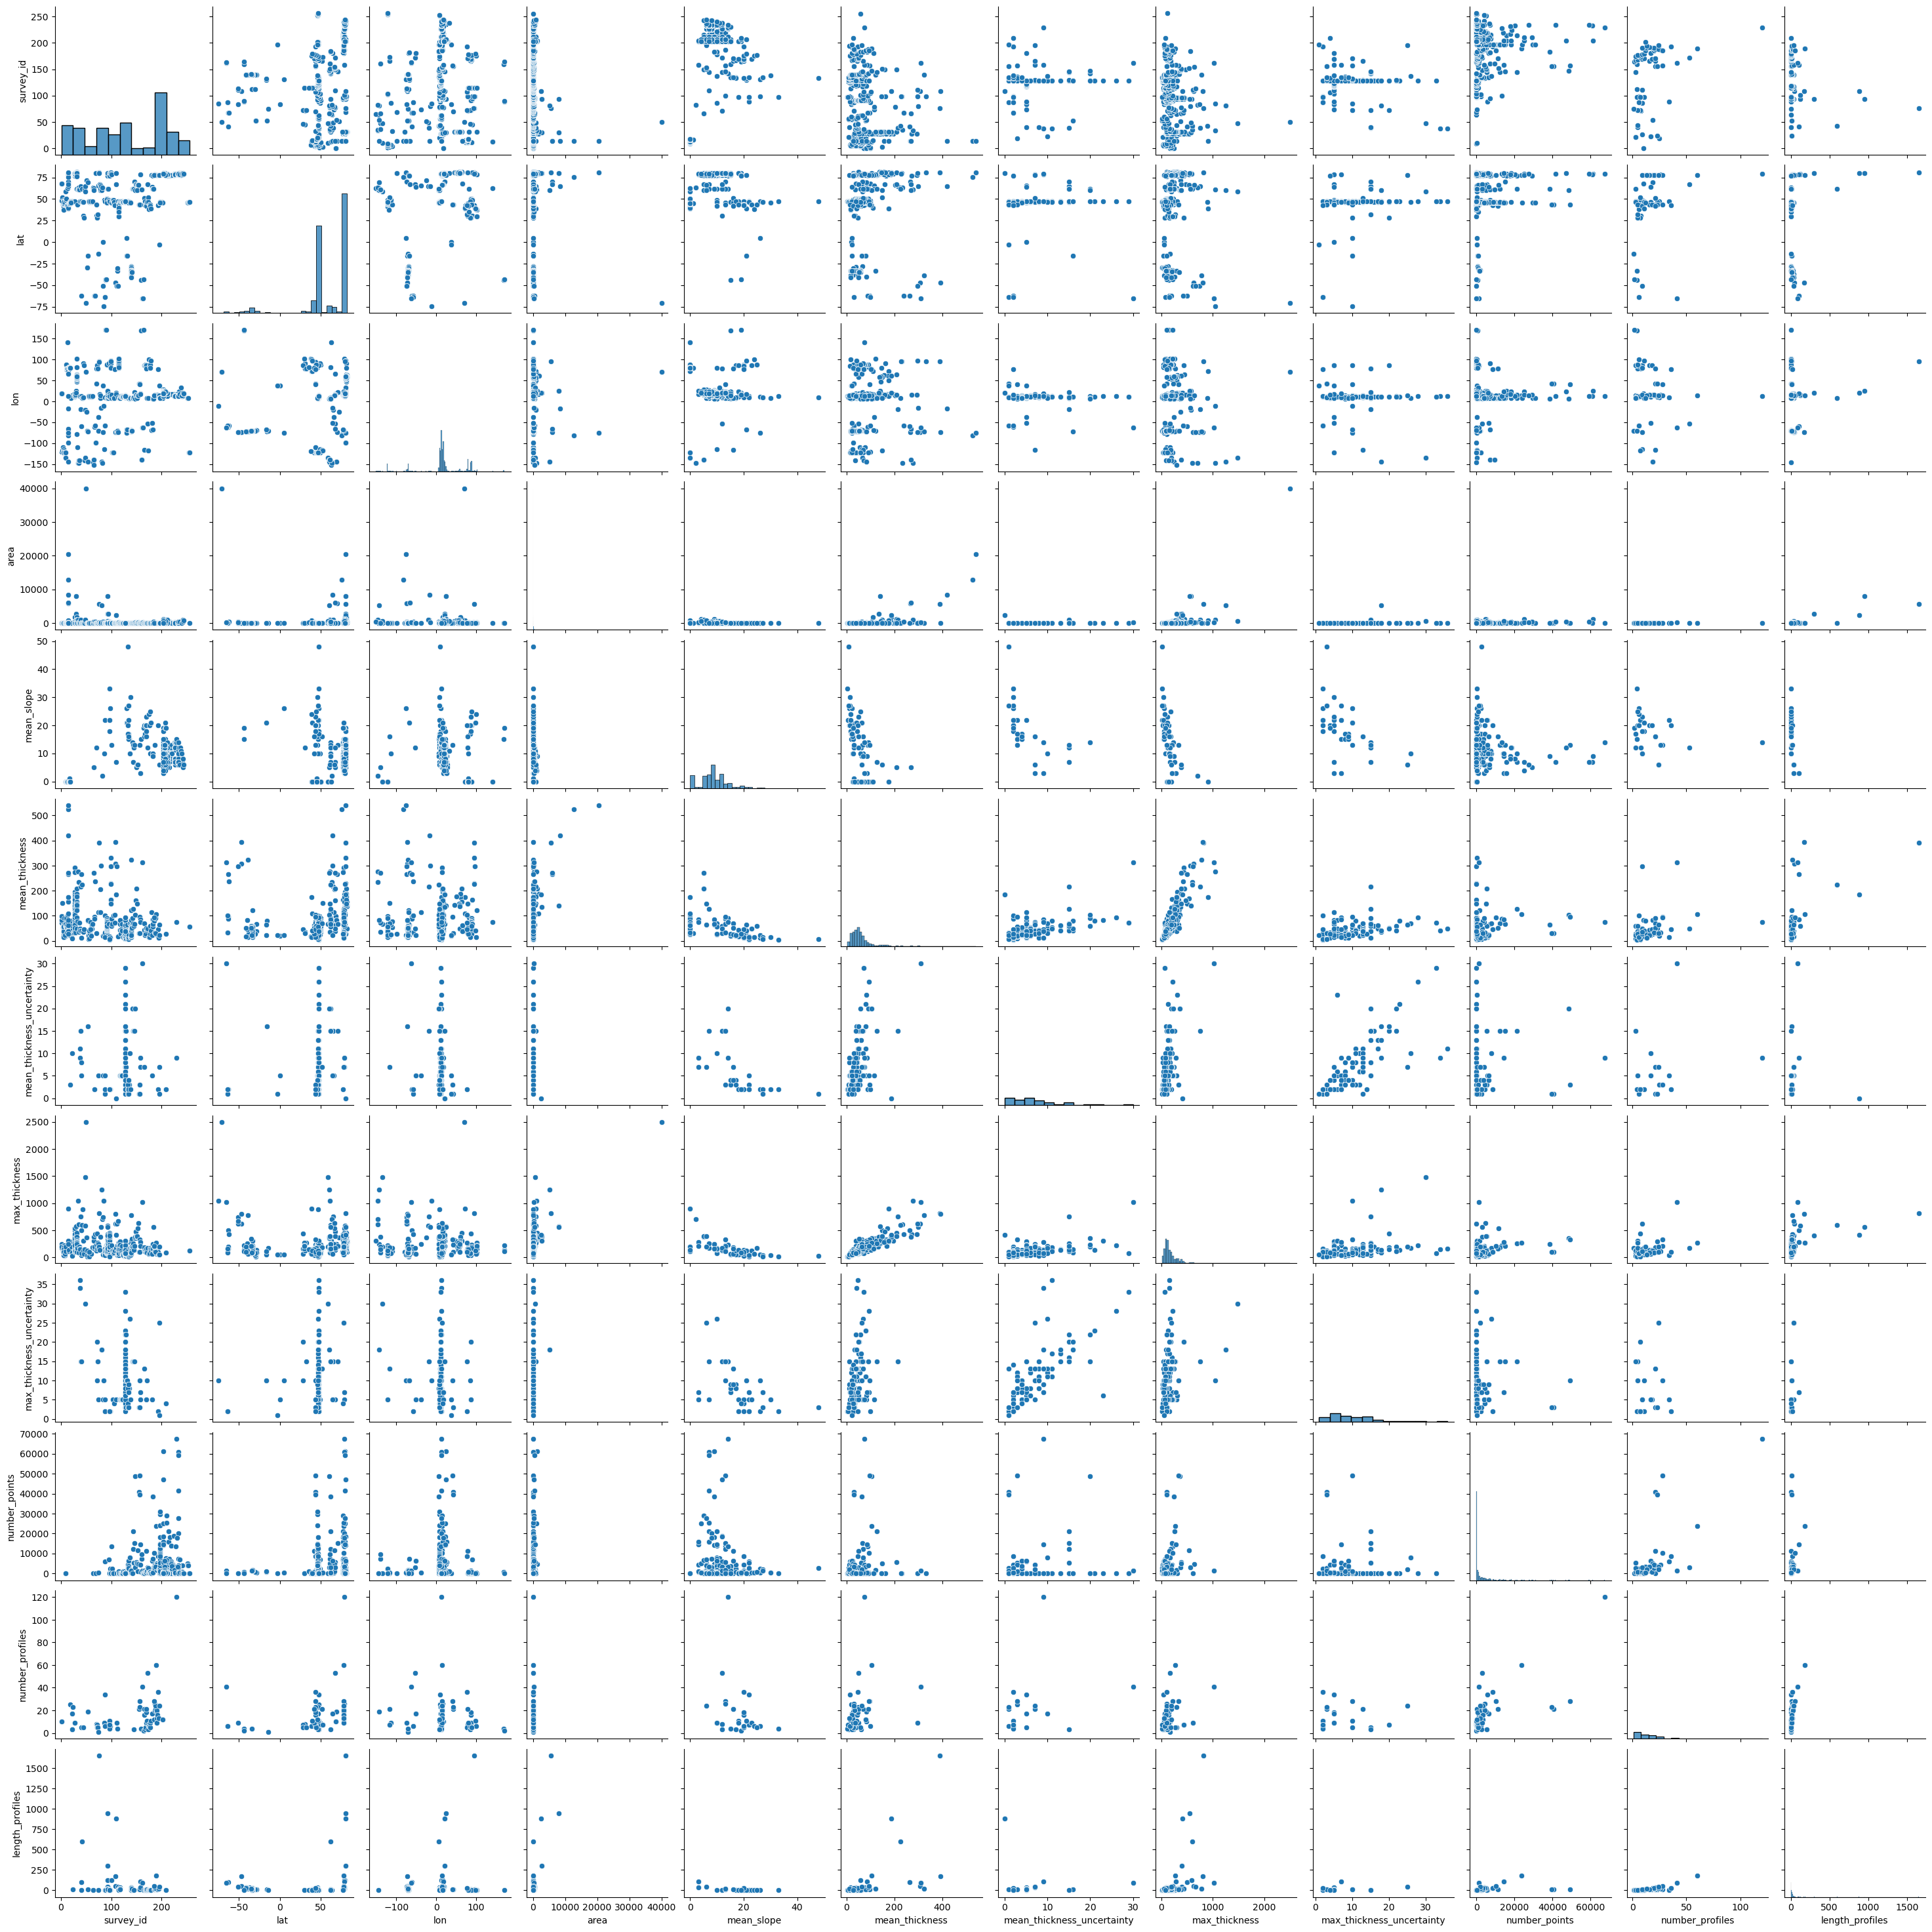

In [5]:
sns.pairplot(G)

In [6]:
lat = G['lat']
print(lat)

id
1       67.91500
2       67.91000
3       67.90000
4       48.35698
5       52.17540
          ...   
6627    46.20240
6628    46.20240
6629    46.20398
6630    47.08670
6631    47.08670
Name: lat, Length: 1013, dtype: float64


In [10]:
G['area'] = np.log(G['area'])

In [11]:
sns.pairplot(G)

In [16]:
ds = G[['lat','lon','area','mean_slope','mean_thickness']]
print(ds)


           lat        lon      area  mean_slope  mean_thickness
id                                                             
1     67.91500   18.56800  0.262364         NaN            72.0
2     67.91000   18.49600  1.410987         NaN            84.0
3     67.90000   18.57000  1.131402         NaN            99.0
4     48.35698 -121.05735  0.693147         NaN            99.0
5     52.17540 -117.28400  1.335001         NaN           150.0
...        ...        ...       ...         ...             ...
6627  46.20240 -121.49090       NaN         NaN             NaN
6628  46.20240 -121.49090  2.785011         NaN            57.0
6629  46.20398 -121.49376       NaN         NaN             NaN
6630  47.08670   12.38000  1.172172         NaN            39.0
6631  47.08670   12.38000       NaN         NaN             NaN

[1013 rows x 5 columns]


In [19]:
ds = ds.dropna()

In [21]:
X = ds[['lat','lon','area','mean_slope']]
print(X)

            lat         lon      area  mean_slope
id                                               
33    48.750000 -121.830000  1.064711         0.0
34    58.380000 -134.360000  2.459589         0.0
35    50.061340   87.697410  1.638997         0.0
36    50.049670   87.745520  1.043804         0.0
37    50.080080   87.690250  1.783391         0.0
...         ...         ...       ...         ...
2111  78.245480   16.064380  0.741937        13.0
2119  43.043653   77.080587  0.959350        20.0
2123  77.971400   14.069100  1.907615         6.0
2240  77.027200   15.485400 -0.994252        19.0
2328  78.871000   12.161400  1.526056        14.0

[110 rows x 4 columns]


In [22]:
y = ds['mean_thickness']


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn import metrics

In [31]:
rf_clf = RandomForestClassifier(random_state=42, verbose=True) # model design
rf_clf.fit(X_train, y_train)# learn
rf_prediction = rf_clf.predict(X_test) # predict on test
print("Random Forest Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=rf_prediction))

Random Forest Accuracy: 0.045454545454545456


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [33]:
clf = SVC(gamma=0.001) # model design
clf.fit(X_train, y_train) # learn
svc_prediction = clf.predict(X_test) # predict on test
print("SVC Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=svc_prediction))

SVC Accuracy: 0.045454545454545456


In [26]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [32]:
#pre=np.zeros(len(classifiers))
#rec=np.zeros(len(classifiers))
#f1=np.zeros(len(classifiers))
for ii,iclass in enumerate(classifiers):
    iclass.fit(X_train, y_train)
    y_test_pred=iclass.predict(X_test)
    #pre[ii] =precision_score(y_test,y_test_pred)
    #rec[ii] =recall_score(y_test,y_test_pred)
    #f1[ii] =f1_score(y_test,y_test_pred)

df=pd.DataFrame({'CLF name':names,'precision':pre,'recall':rec,'f1_score':f1})
print(df)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].